In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#%config InlineBackend.figure_format = 'retina'

def carregar_dados():
    precos = pd.read_csv("../dados/cotacoes-2021-abr.csv", index_col=0, parse_dates=True)
    cake = pd.read_csv("../dados/cake-2021-abr.csv", index_col=0, parse_dates=True)
    near = pd.read_csv("../dados/near-2021-abr.csv", index_col=0, parse_dates=True)
    precos['CAKE'] = cake['price']
    precos['NEAR'] = cake['price']

    return precos

def carregar_precos_btc():
    precos = pd.read_csv("../dados/btc-2018.csv", index_col=0, parse_dates=True)
    return precos

def calcular_rendimento_acumulado():
    return ((precos.pct_change() + 1).cumprod() - 1) * 100

In [2]:
precos = carregar_dados()
precos

,BTC,ETH,BNB,ADA,LINK,SOL,DOT,UNI,LUNA,AVAX,ALGO,ATOM,EGLD,AAVE,COMP,CAKE,NEAR
Date,,,,,,,,,,,,,,,,,
2021-03-31,59095.808594,1977.276855,335.212891,1.189244,30.233219,19.084902,37.672878,28.739431,18.516495,28.418751,1.326109,19.644238,150.085205,377.611786,451.351959,18.934845,18.934845
2021-04-01,59384.312500,2143.225586,339.007721,1.196509,32.533249,19.810223,41.164284,30.175646,18.566605,29.117611,1.361270,20.412689,167.626541,406.692291,485.387451,18.199790,18.199790
2021-04-02,57603.890625,2028.422485,323.133514,1.173277,29.534889,22.552277,41.646030,29.549885,18.141928,28.251848,1.269547,20.268381,158.691376,385.420563,480.830414,17.186109,17.186109
2021-04-03,58758.554688,2093.122803,351.624390,1.191420,30.957281,24.061323,44.652210,31.065556,18.347498,29.329712,1.314932,21.737732,168.694839,404.309723,552.177246,17.100183,17.100183
2021-04-04,59057.878906,2107.887207,367.772491,1.214300,32.396656,22.984283,45.797230,30.794846,17.560474,31.246593,1.405011,21.462709,166.738327,397.924561,511.330719,15.652314,15.652314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-19,65992.835938,4155.992188,501.020325,2.185950,27.419165,175.946869,44.348656,27.037132,42.554741,59.559841,1.788533,35.880650,239.944122,315.649414,322.263977,19.827654,19.827654
2021-10-20,62210.171875,4054.322754,471.256927,2.136591,28.268347,190.318436,42.846519,26.111134,40.906372,61.309811,1.782411,34.329605,248.532318,315.022186,315.591797,20.130108,20.130108
2021-10-21,60692.265625,3970.181885,478.643158,2.154199,28.661047,196.431534,43.449368,25.637157,43.615402,65.455284,1.859406,34.041546,274.462250,309.997772,315.822418,20.516763,20.516763


# Rendimento no período

<AxesSubplot:title={'center':'Rendimento dos ativos no período'}>

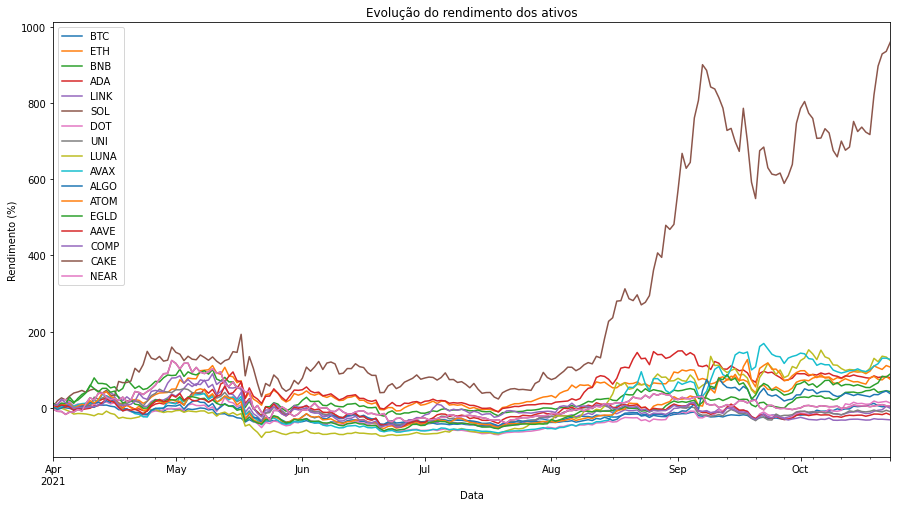

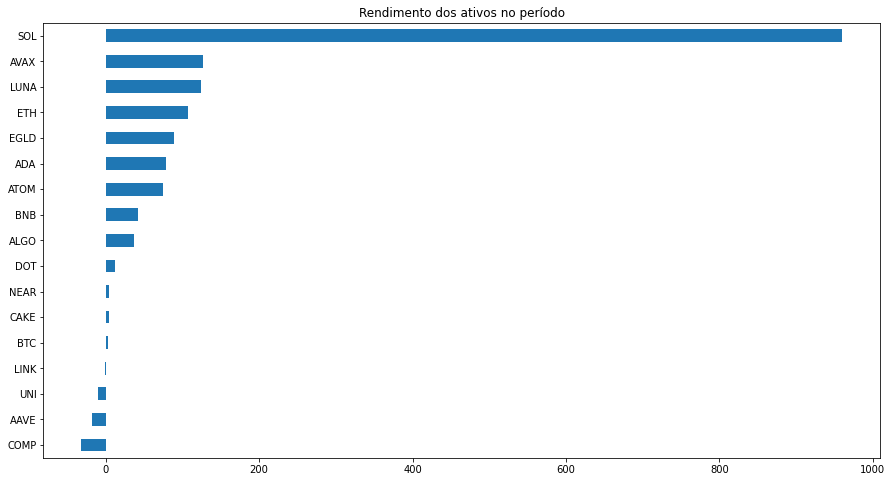

In [3]:
# evolução do rendimento
rendimento = calcular_rendimento_acumulado()
rendimento = rendimento[1:]
rendimento.plot(title='Evolução do rendimento dos ativos', xlabel='Data', ylabel='Rendimento (%)', figsize=(15,8))
# rendimento no final do período
rendimento_final = rendimento[-1:].T
rendimento_final = rendimento_final.sort_values(by=rendimento_final.columns.tolist()[0])
rendimento_final.plot(kind='barh', title='Rendimento dos ativos no período', legend=False, figsize=(15,8))

In [4]:
rendimento_final

Date,2021-10-23
COMP,-31.606736
AAVE,-18.362676
UNI,-10.098244
LINK,-1.529319
BTC,3.105173
CAKE,4.828030
NEAR,4.828030
DOT,12.509742
ALGO,36.989713
BNB,42.188183


# Correlações

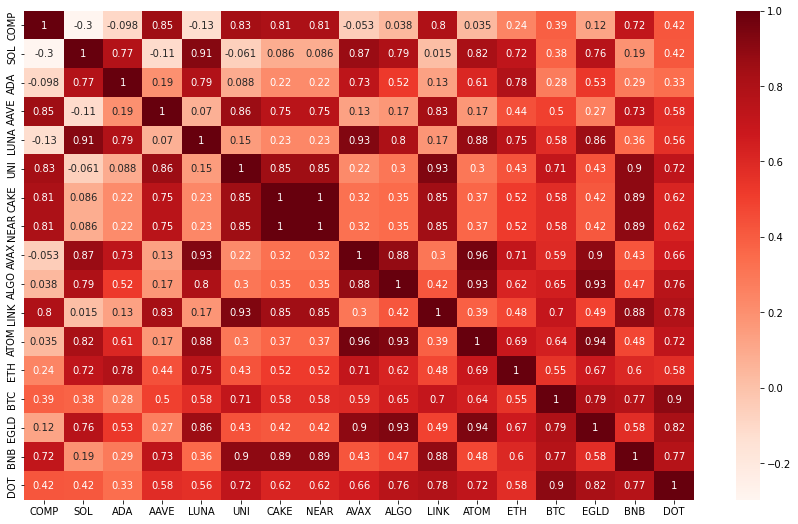

In [5]:
# Get correlation and sort by sum
sum_corr = precos.corr().sum().sort_values(ascending=True).index.values
correlacoes = precos[sum_corr].corr()

plt.figure(figsize=(15, 9))
sns.heatmap(correlacoes, annot=True, cmap='Reds');

<AxesSubplot:title={'center':'Evolução dos rendimentos ALGO x UNI'}, ylabel='Rendimento acumulado(%)'>

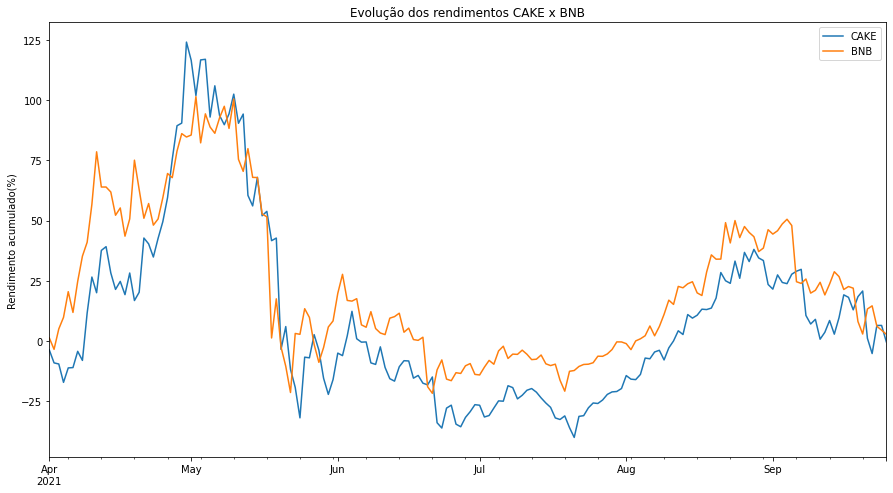

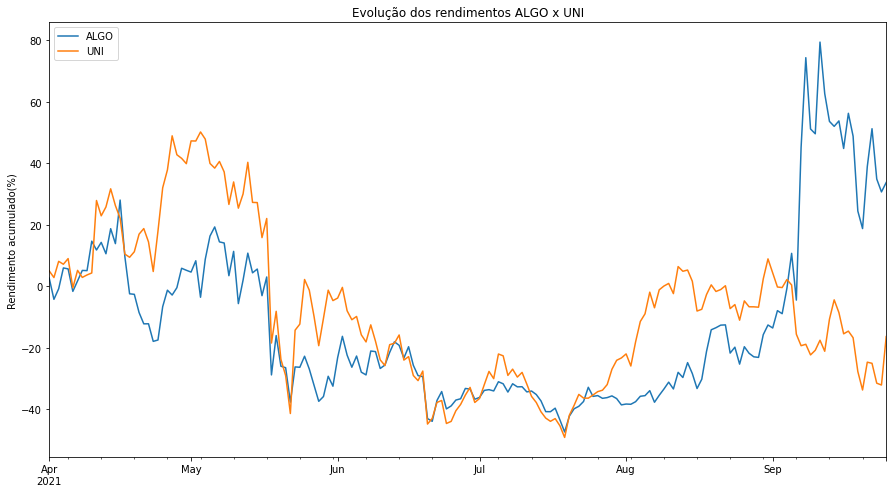

In [18]:
# evolução do rendimento - cake e bnb
rendimento[['CAKE', 'BNB']].plot(title='Evolução dos rendimentos CAKE x BNB', xlabel='', ylabel='Rendimento acumulado(%)', figsize=(15,8))

# evolução do rendimento - ETH e UNI
rendimento[['ALGO', 'UNI']].plot(title='Evolução dos rendimentos ALGO x UNI', xlabel='', ylabel='Rendimento acumulado(%)', figsize=(15,8))

<AxesSubplot:title={'center':'Evolução dos rendimentos BCH x LTC'}, ylabel='Rendimento acumulado(%)'>

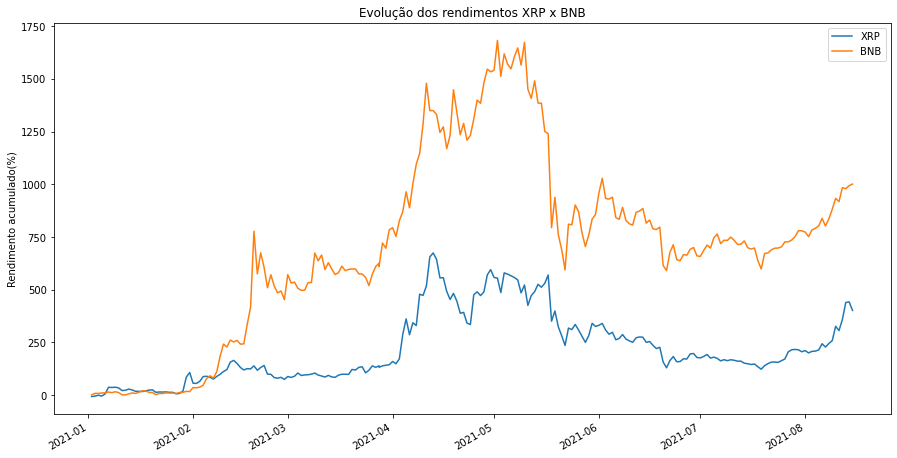

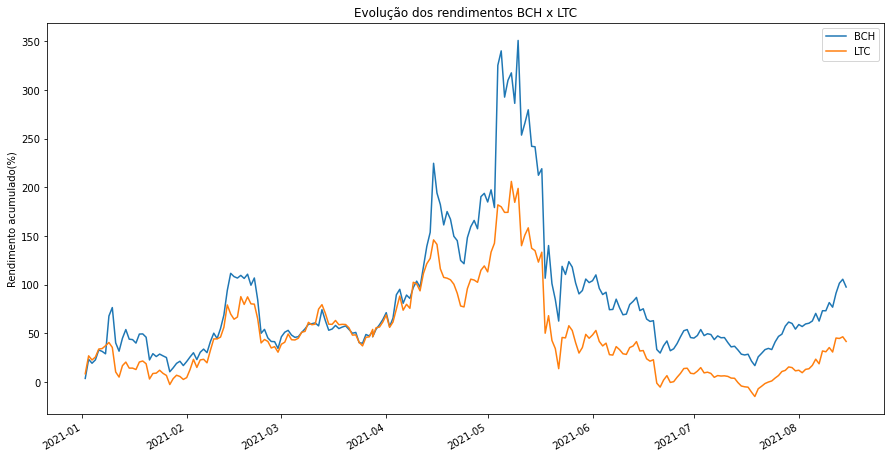

In [7]:
# evolução do rendimento - XRP e BNB
rendimento[['XRP', 'BNB']].plot(title='Evolução dos rendimentos XRP x BNB', xlabel='', ylabel='Rendimento acumulado(%)', figsize=(15,8))

# evolução do rendimento - BCH e LTC
rendimento[['BCH', 'LTC']].plot(title='Evolução dos rendimentos BCH x LTC', xlabel='', ylabel='Rendimento acumulado(%)', figsize=(15,8))

# Variação média nos meses

In [19]:
precosBtc = carregar_precos_btc()
variacao_mensal = precosBtc.resample('M').agg( lambda x: x[-1] )
variacao_mensal = variacao_mensal.pct_change()[1:]
variacao_mensal = variacao_mensal * 100

In [20]:
variacao_mensal['ano'] = variacao_mensal.index.year
variacao_mensal['mes'] = variacao_mensal.index.month
variacao_mensal.set_index(['ano', 'mes'], inplace=True)
variacao_mensal = variacao_mensal.unstack(level='ano')
variacao_mensal.columns = variacao_mensal.columns.droplevel(0)
variacao_mensal['media'] = variacao_mensal.mean(axis=1)

In [199]:
variacao_mensal[['media']]

ano,media
mes,
1,2.188399
2,10.371941
3,-4.981186
4,24.216931
5,4.836251
6,-2.366791
7,16.042813
8,1.261299
9,-11.381124


<AxesSubplot:title={'center':'Variação em cada mês'}, xlabel='Mês', ylabel='Variação(%)'>

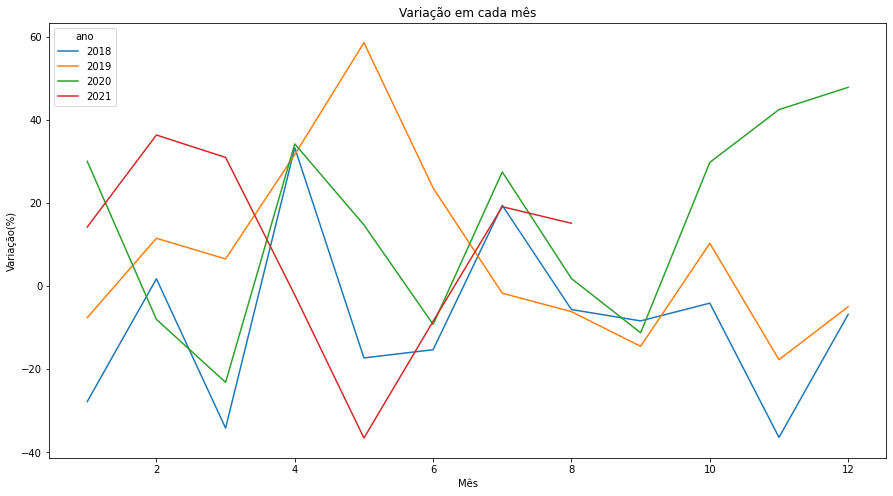

In [21]:
variacao_mensal[[2018, 2019, 2020, 2021]].plot(title='Variação em cada mês', xlabel='Mês', ylabel='Variação(%)', figsize=(15,8))